# Boundary Time Crystals in Collective Spin Models

**Dominik Németh**  
_PhD Student, Theoretical Physics_  
_University of Manchester_  
_14 July 2025_

In [35]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import scienceplots
import itertools

plt.style.use(['science'])

# Exact Dynamics via Numerical Method

$H = -N  \Omega_x J_x $

$ \frac{d}{dt} \rho = -i [H, \rho] + N \Gamma_{\uparrow} \left(J_{+} \rho J_{-} - \frac{1}{2} \{J_{-}J_{+}, \rho \} \right) + N \Gamma_{\downarrow} \left(J_{-} \rho J_{+} - \frac{1}{2} \{J_{+}J_{-}, \rho \} \right)$

$ J_{\alpha} =2/N \sum_{i} \sigma_i^{\alpha} /2 $

## Build Model via QuTiP

In [60]:
# Parameters (to be adjusted)
N = 10 # N is Number of spins
omega_x = 1 # Coefficient for Jx
Gamma_up = 0.1 # Rate for the upward incoherent process
Gamma_down = 0.0 # Rate for the downward incoherent process
T = 50 # Total time
n_steps = 1000 # Number of time steps

times = np.linspace(0, T, n_steps)

In [61]:
# Define collective spin operators
Jx = 2/N * qt.jmat(N/2, 'x')  # Collective Jx operator
Jy = 2/N * qt.jmat(N/2, 'y')  # Collective Jy operator
Jz = 2/N * qt.jmat(N/2, 'z')  # Collective Jz operator

# Hamiltonian
H = -N * omega_x* Jx

# Lindblad collapse operators
J_plus = Jx + 1j * Jy  # J^+ operator
J_minus = Jx - 1j * Jy  # J^- operator

# Collapse operators with rates Gamma_up and Gamma_down
c_ops = [
    np.sqrt(N * Gamma_up) * J_minus,
    np.sqrt(N * Gamma_down) * J_plus,
]


# Initial state: Maximally polarized state along z-axis
initial_state = (qt.basis(N+1, 0)) # All spins down in z direction

## Dynamics via Master Equation Solver

In [15]:
# Time evolution
times = np.linspace(0, T, n_steps)
result = qt.mesolve(H, initial_state, times, c_ops, [Jz], options={"progress_bar": True})

# Plot results
exp_Jz = result.expect[0]

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.1%. Run time:   0.02s. Est. time left: 00:00:00:00
60.1%. Run time:   0.02s. Est. time left: 00:00:00:00
70.1%. Run time:   0.03s. Est. time left: 00:00:00:00
80.1%. Run time:   0.03s. Est. time left: 00:00:00:00
90.1%. Run time:   0.03s. Est. time left: 00:00:00:00
100.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


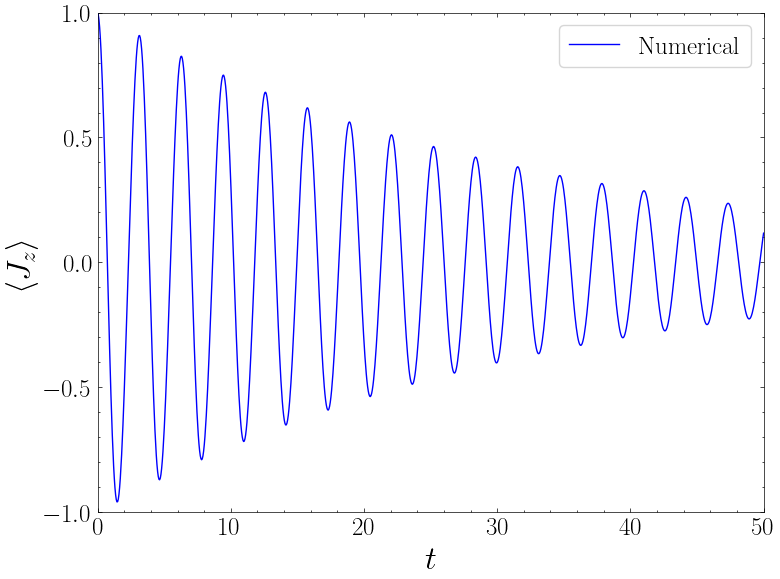

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel(r"$t$", fontsize=24)
ax.set_ylabel(r"$\langle J_z \rangle$", fontsize=24)

ax.plot(times, exp_Jz, color='blue', lw=1, alpha=1, label='Numerical')

# Make x-axis and y-axis tick labels bigger
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Set x and y ticks
ax.set_xticks([0,10, 20, 30, 40,50])
ax.set_yticks([-1,-0.5, 0,0.5, 1])

plt.xlim((0,50))
plt.ylim((-1,1))
plt.tight_layout()
plt.legend(fancybox=1, frameon=1, fontsize=18)
plt.show()

## Comparing Different Models

Model 1

In [26]:
# Time evolution
times = np.linspace(0, T, n_steps)
result = qt.mesolve(H, initial_state, times, c_ops, [Jz], options={"progress_bar": True})
exp_Jz1 = result.expect[0]

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.1%. Run time:   0.03s. Est. time left: 00:00:00:00
60.1%. Run time:   0.03s. Est. time left: 00:00:00:00
70.1%. Run time:   0.03s. Est. time left: 00:00:00:00
80.1%. Run time:   0.04s. Est. time left: 00:00:00:00
90.1%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


/opt/anaconda3/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Model 2

In [27]:
# Change model jump operators first!
result = qt.mesolve(H, initial_state, times, c_ops, [Jz], options={"progress_bar": True})
exp_Jz2 = result.expect[0]

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.1%. Run time:   0.02s. Est. time left: 00:00:00:00
60.1%. Run time:   0.03s. Est. time left: 00:00:00:00
70.1%. Run time:   0.03s. Est. time left: 00:00:00:00
80.1%. Run time:   0.04s. Est. time left: 00:00:00:00
90.1%. Run time:   0.04s. Est. time left: 00:00:00:00
100.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


Plot results for both models

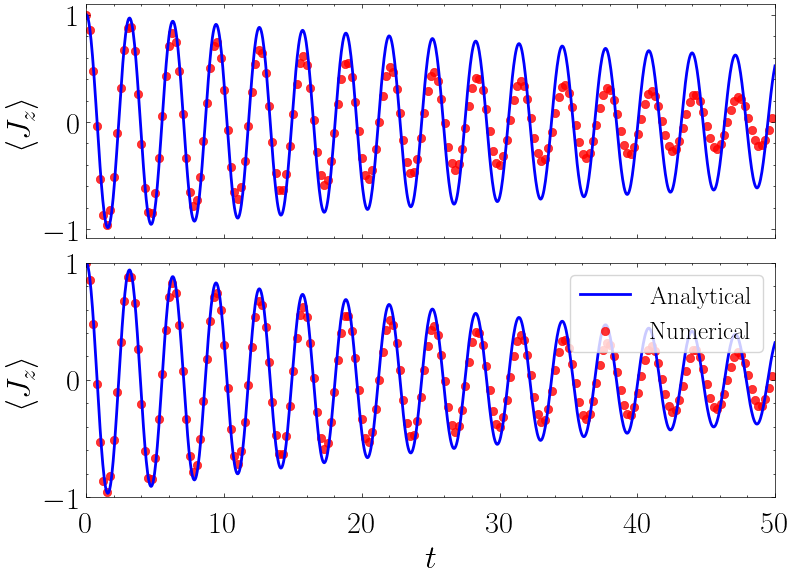

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.set_ylabel(r"$\langle J_z \rangle$", fontsize=24)
ax2.set_xlabel(r"$t$", fontsize=24)
ax2.set_ylabel(r"$\langle J_z \rangle$", fontsize=24)

# Analytical functions for model with  J_z jump operator
def func1(t):
    kappa = Gamma_up / N
    omega = 2 * omega_x
    f = omega * np.sqrt(1 - (kappa / omega) ** 2)
    return np.cos(f * t) * np.exp(-kappa * t)


# Analytical functions for model with J_x jump operator   
def func2(t):
    kappa = Gamma_up / N
    omega = 2 * omega_x
    return np.cos(omega * t) * np.exp(-2 * kappa * t)

analytical = [func1(t) for t in times]
ax1.plot(times, analytical, color='blue', linestyle='-', lw=2, alpha=1, label='Analytical')
ax1.scatter(times[::5], exp_Jz1[::5], color='red', lw=0.5, alpha=0.8, label='Numerical')

for label in ax1.get_xticklabels():
    label.set_size(22)  # Set x-axis tick label size

for label in ax1.get_yticklabels():
    label.set_size(22)  # Set y-axis tick label size


analytical = [func2(t) for t in times]
ax2.plot(times, analytical, color='blue',linestyle='-', lw=2, label='Analytical')
ax2.scatter(times[::5], exp_Jz2[::5], color='red',lw=0.5, alpha=0.8, label='Numerical')

for label in ax2.get_xticklabels():
    label.set_size(22)  # Set x-axis tick label size

for label in ax2.get_yticklabels():
    label.set_size(22)  # Set y-axis tick label size
    
ax2.tick_params(axis='x', pad=10)  # increases space between x-axis ticks and labels
ax2.set_xticks([0,10, 20, 30, 40,50])
ax1.set_yticks([-1, 0, 1])
ax2.set_yticks([-1, 0, 1])
plt.tight_layout()
plt.xlim((0, 50))
plt.ylim((-1, 1))
plt.legend(fancybox=1, frameon=1, loc='upper right', fontsize=18)
#plt.savefig('', dpi=300) # Enter your file name here
plt.show()

# Decomposing the solution into the eigenstates of the Liouvillian

$| \dot{\rho} \rangle \rangle = \mathcal{L} |\rho \rangle \rangle $

$ | \rho(t) \rangle \rangle = e^{ \mathcal{L} t} | \rho(0) \rangle \rangle$

Decompose $\mathcal{L}$ into its right and left eigenstates

$\mathcal{L} |r_i \rangle \rangle =  \lambda_i | r_i \rangle \rangle$

$\mathcal{L}^{\dagger} |l_i \rangle \rangle = \lambda_i^{*} | l_i \rangle \rangle$

Then,

$| \rho(t) \rangle \rangle = \sum_{j} c_j \,  e^{\lambda_j t} |r_j \rangle \rangle$

In [62]:
# Construct the Liouvillian
L = qt.liouvillian(H, c_ops)

# Get the eigenvalues of the Liouvillian
eigenvalues, _ = L.eigenstates()

## Eigenvalue spectrum

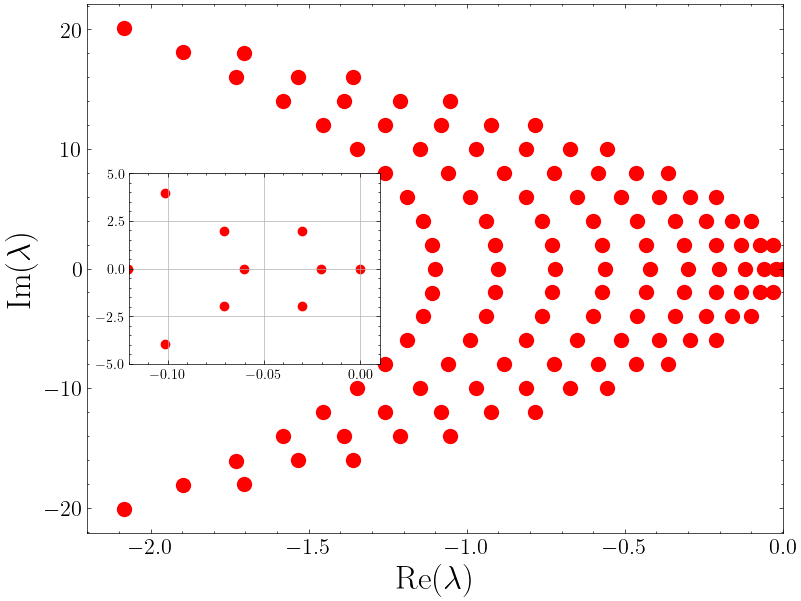

In [38]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=1)
sc = ax.scatter(np.real(eigenvalues), np.imag(eigenvalues), label=r'$\bar{\Gamma}/2\Omega_x =0.1$', color='red', marker='o', s=100)

ax.set_xlabel(r'$\operatorname{Re}(\lambda)$', fontsize=24)
ax.set_ylabel(r'$\operatorname{Im}(\lambda)$', fontsize=24)

ax.grid(0)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim(-2.2, 0.0)
ax.set_xticks([-2,-1.5, -1.0,-0.5, 0.0])
ax.set_yticks([-20, -10, 0, 10, 20])

# Adding an inset
inset = inset_axes(ax, width="30%", height="30%", loc="center left", 
                   bbox_to_anchor=(0.05, -0.1, 1.2, 1.2), bbox_transform=ax.transAxes)  # Adjust size and position of the inset
inset.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='red')
inset.set_xlim(-0.12, 0.01)  # Zoomed-in x range
inset.set_ylim(-5, 5)  # Zoomed-in y range
inset.set_xticks([-0.1,-0.05, -0.0,])
inset.set_yticks([-5,-2.5,0,2.5,5])
inset.grid(True)

#plt.savefig('liouvillian_spectrum_N_10_01_inset.pdf', dpi=300)
plt.show()

Define expressions for the eigenvalues

In [ ]:
# Eigenvalue functions for the Liouvillian

# Imaginary part of the eigenvalue
def imag_part(m1, m2):
    return -2 * omega_x * (m1 - m2)

# Real part of the eigenvalue
def real_part(m1, m2, s):
    # Return the correct line based on the model
    r1 = - 2/N * Gamma_up * (N*(N/2 + 1) - m1*(m1+1) - m2*(m2+1)) # for Hamiltonian with Jz, jump operator J+
    r2 =  -1/N * Gamma_up * ((m1-m2)**2 + s*(s+1)) # for Hamiltonian with Jx, jump operator J-
    r3 = 1/N * Gamma_up * ((m1-m2)**2 - s*(s+1)) # for Hamiltonian with Jx, jump operator Jz
    r4 = -2/N * Gamma_up * ((m1-m2)**2) # for Hamiltonian with Jx, jump operator Jx
    return r2

Compare eigenvalues obtained via analytical method to numerically exact eigenvalues

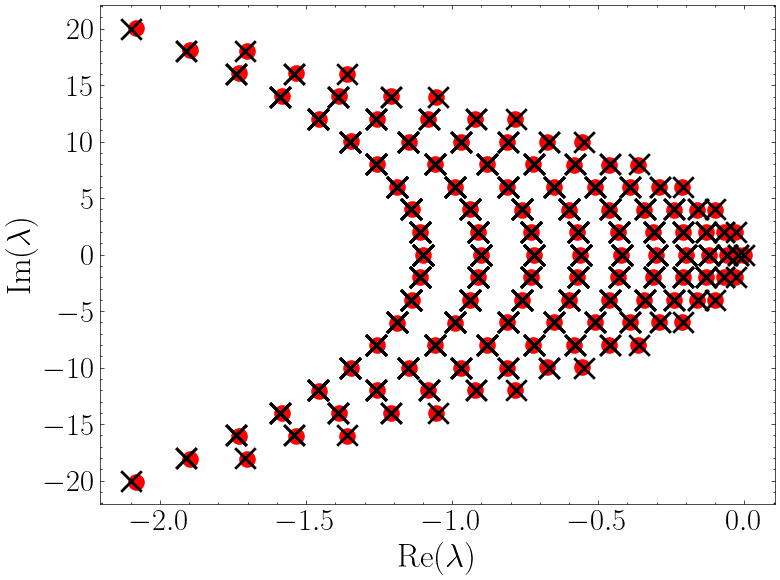

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the (exact) numerical eigenvalues
sc = ax.scatter(np.real(eigenvalues), np.imag(eigenvalues),s=120, label='Numerical', marker='o',
                color='red', alpha=1)

ax.set_xlabel('$\\operatorname{Re}(\\lambda)$ ', fontsize=24) #24 for 8,6 figure
ax.set_ylabel('$\\operatorname{Im}(\\lambda)$', fontsize=24)

# Change size of x and y tick labels
for label in ax.get_xticklabels():
    label.set_size(22)  # Set x-axis tick label size

for label in ax.get_yticklabels():
    label.set_size(22)  # Set y-axis tick label size
ax.grid(0)

# Plot analytical eigenvalues
# Loop over all possible values of s (total superspin)
for s in range(int(N+1)):
    m = np.arange(-s/2, s/2, 1-1e-10) # Generate m values for the current s
    if len(m)==0:
        m = [0]
    combinations = np.array(list(itertools.product(m, m)))  # All combinations of m1, m2
    evals_an= np.array([(real_part(m1, m2, s)+1j*imag_part(m1,m2)) for m1, m2 in combinations]) # Analytical eigenvalues
    ax.scatter(np.real(evals_an), np.imag(evals_an), s=220, marker='x', linewidth=2, color='black', alpha=1)
    
plt.tight_layout()
#plt.legend(fancybox=1, frameon=1, fontsize=18)
#plt.savefig('simple_liouvillian_spectrum.pdf', transparent=0, dpi=300)
plt.show()

# Analysing the Thermodynamic Limit

## Density of Sectors

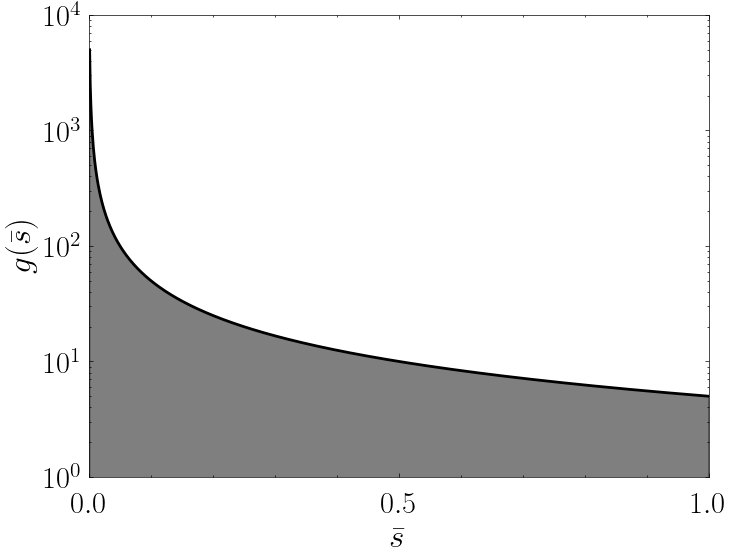

In [ ]:
Gamma = 0.1  # Define Gamma if not already defined
s_bar = np.linspace(0.001, 1, 1000)  # Start from 0.001 to avoid division by zero
DOS = 1 / (2 * Gamma * s_bar) # Density of states

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(s_bar, DOS, label='Density of States', c='black', lw=2)
ax.fill_between(s_bar, DOS, color='black', alpha=0.5)  # Fill below the curve

ax.set_xlim(0, 1)
ax.set_ylim(1, 1e4)
   
ax.set_xlabel(r"$\bar{s}$", fontsize=24)
ax.set_ylabel(r"$g(\bar{s})$", fontsize=24)

for label in ax.get_xticklabels():
    label.set_size(22)  # Set x-axis tick label size

for label in ax.get_yticklabels():
    label.set_size(22)  # Set y-axis tick label size
    
ax.grid(0)
ax.set_xticks([0, 0.5, 1.0])

ax.set_yscale('log')
ax.tick_params(axis='x', pad=10)  # Move x-axis tick labels down
ax.tick_params(axis='y', pad=5)  # Move y-axis tick labels left

#plt.savefig('dos_btc.pdf', dpi=300)
plt.show()

## Density of Eigenmodes

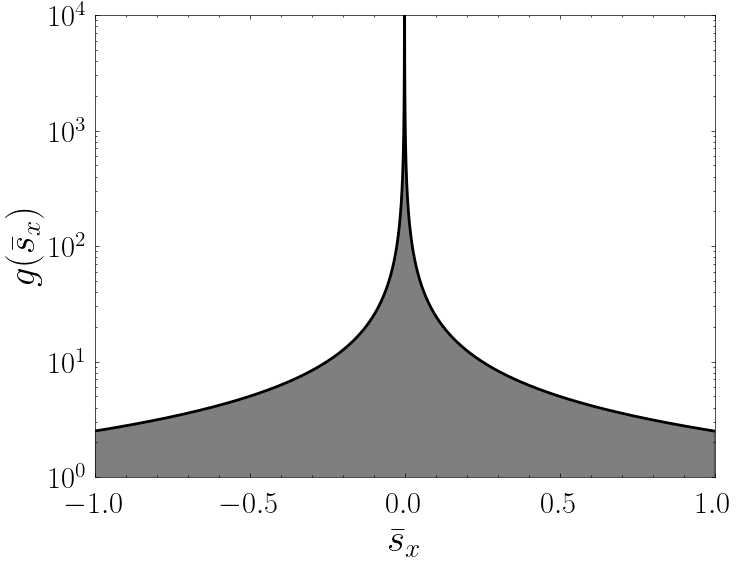

In [ ]:
Gamma = 0.1  # Define Gamma if not already defined
sx_bar = np.linspace(-1, 1, 10000)  
DOM = 1 / (4 * Gamma * np.abs(sx_bar)) # Density of eigenmodes

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sx_bar, DOM, label='Density of States', c='black', lw=2)
ax.fill_between(sx_bar, DOM, color='black', alpha=0.5)  # Fill below the curve

ax.set_xlim(-1, 1)
ax.set_ylim(1, 1e4)
   
ax.set_xlabel(r"${\bar{s}}_x$", fontsize=28)
ax.set_ylabel(r"$g({\bar{s}}_x)$", fontsize=28)

for label in ax.get_xticklabels():
    label.set_size(22)  # Set x-axis tick label size

for label in ax.get_yticklabels():
    label.set_size(22)  # Set y-axis tick label size
    
ax.grid(0)
ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])

ax.set_yscale('log')
ax.tick_params(axis='x', pad=10)  # Move x-axis tick labels down
ax.tick_params(axis='y', pad=5)  # Move y-axis tick labels left

#plt.savefig('dom_jxjx.pdf', dpi=300)
plt.show()